In [62]:
import matplotlib.pyplot as plt


In [63]:
from sklearn.datasets import make_blobs

In [64]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=3,random_state=1)

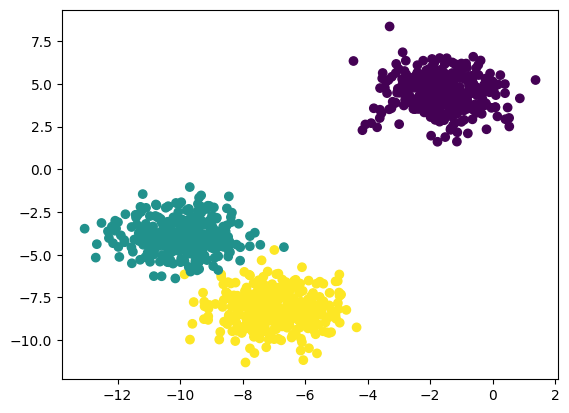

In [65]:
plt.scatter(X[:,0],X[:,1],c=y)

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [67]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)

In [68]:
model.fit(X_train)
y_pred=model.predict(X_train)

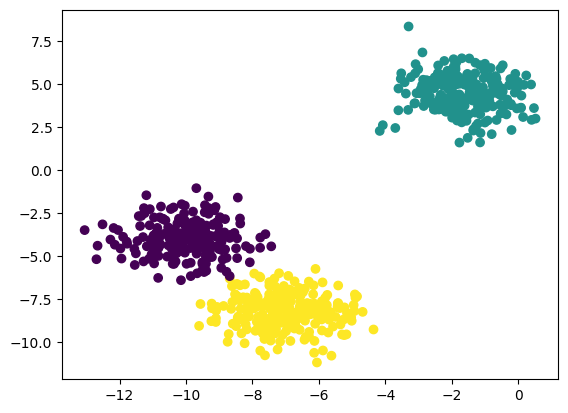

In [69]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_pred)

In [70]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X_train,model.labels_))

0.7179451230427786


# OPTIMAL K

In [71]:
wcss=[]

for k in range(1,11):
    model=KMeans(n_clusters=k)
    model.fit(X_train)
 
    wcss.append(model.inertia_)

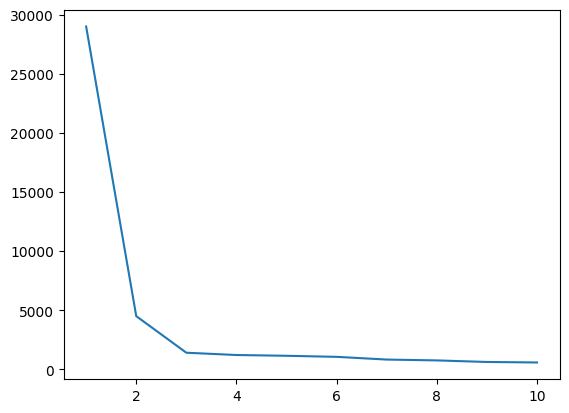

In [72]:
plt.plot(range(1,11),wcss)

In [73]:
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [74]:
from kneed import KneeLocator
k1=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
k1.elbow

np.int64(2)

In [78]:
sil=[]

for k in range(2,11):
    model=KMeans(n_clusters=k)
    model.fit_predict(X_train)
    sc=silhouette_score(X_train,model.labels_)
    sil.append(sc)

In [80]:
sil

[np.float64(0.7674998364431159),
 np.float64(0.7179451230427786),
 np.float64(0.597238991230348),
 np.float64(0.4217940069510864),
 np.float64(0.412519022197883),
 np.float64(0.3328766327015923),
 np.float64(0.33720420029828235),
 np.float64(0.3286245169761541),
 np.float64(0.3432366863039753)]